# MACHINE LEARNING CAPSTONE PROJECT : INSURANCE COST PREDICTION

**IMOPRTING NECESSARY LIBRARIES**

In [2]:
# Data handling & visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import OneHotEncoder        # For categorical encoding (one-hot)
from sklearn.preprocessing import LabelEncoder         # For label encoding categorical variables
from sklearn.preprocessing import StandardScaler       # For standardizing features

# Model selection & splitting
from sklearn.model_selection import train_test_split   # Train-test split
from sklearn.model_selection import GridSearchCV       # Hyperparameter tuning (grid search)
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter tuning (random search)

# Regression models
from sklearn.linear_model import LinearRegression      # Linear Regression
from sklearn.tree import DecisionTreeRegressor         # Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor     # Random Forest Regressor
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Regressor
from xgboost import XGBRegressor                       # XGBoost Regressor
from sklearn.svm import SVR                            # Support Vector Machine

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score  # Performance metrics


**LOADING DATASET**

In [3]:
# Load the dataset from CSV file into a pandas DataFrame
data = pd.read_csv('datasets_13720_18513_insurance(1).csv')

# Display the DataFrame to check the data
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**BASIC INFORMATION OF DATA**

In [4]:
# Display the first 5 rows of the dataset to quickly inspect the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Display the last 5 rows of the dataset to inspect the end of the data
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# Check the number of rows and columns in the dataset
data.shape

(1338, 7)

In [7]:
# Get a concise summary of the DataFrame
# Shows number of non-null entries, data types, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**INSIGHTS**

**STATISTICAL SUMMARY OF NUMERIC COLUMNS IN YOUR DATAFRAME**

In [8]:
# Generate descriptive statistics for numeric columns
# Includes count, mean, std, min, 25%, 50%, 75%, and max values
data.describe()                

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**SUMMARY OF CATEGORICAL FEATURES**

In [9]:
# Generate descriptive statistics for categorical (object) columns
# Includes count, unique values, top (most frequent) value, and frequency of top value
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**SUMMARY OF ALL COLUMNS**

In [10]:
# Generate descriptive statistics for all columns (numeric + categorical)
# Numeric: count, mean, std, min, quartiles, max
# Categorical: count, unique, top (most frequent), freq (frequency of top)
data.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**THERE IS NO NULL VALUES IN DATA**

In [11]:
# Check for missing values in each column
# Returns the count of null (NaN) values per column
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**CATEGORICAL DATA OVERVIEW**

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


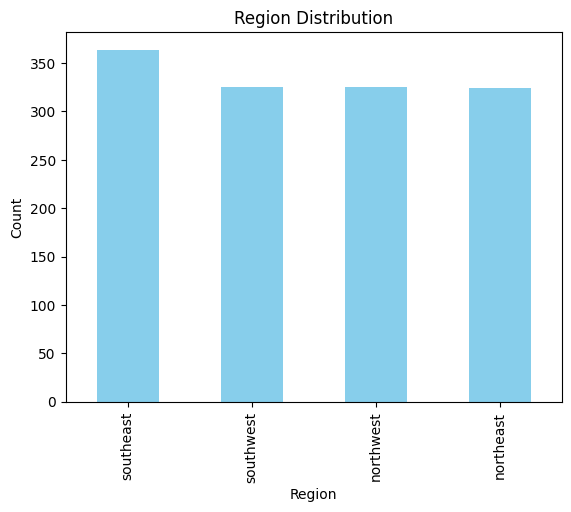

In [12]:
# Count the number of occurrences of each category in the 'region' column
region_counts = data['region'].value_counts()
print(region_counts)

# Visualize the distribution of 'region' categories as a bar chart
region_counts.plot(
    kind='bar',           # Bar chart
    title='Region Distribution',  # Chart title
    color='skyblue'       # Optional: add a color for better visualization
)
plt.xlabel('Region')      # Label for x-axis
plt.ylabel('Count')       # Label for y-axis
plt.show()                # Display the plot


smoker
no     1064
yes     274
Name: count, dtype: int64


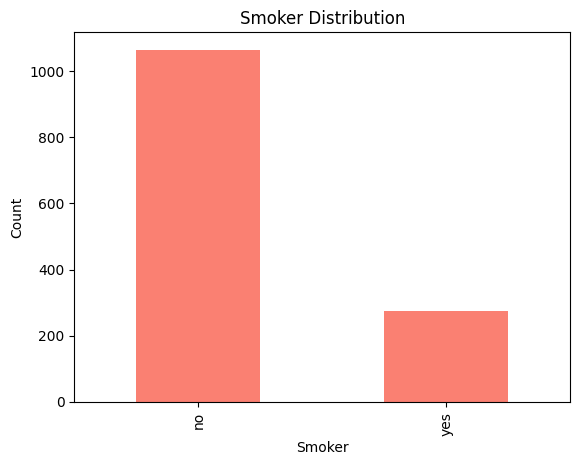

In [13]:
# Count the number of occurrences of each category in the 'smoker' column
smoker_counts = data['smoker'].value_counts()
print(smoker_counts)

# Visualize the distribution as a bar chart
smoker_counts.plot(kind='bar', title='Smoker Distribution', color='salmon')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


sex
male      676
female    662
Name: count, dtype: int64


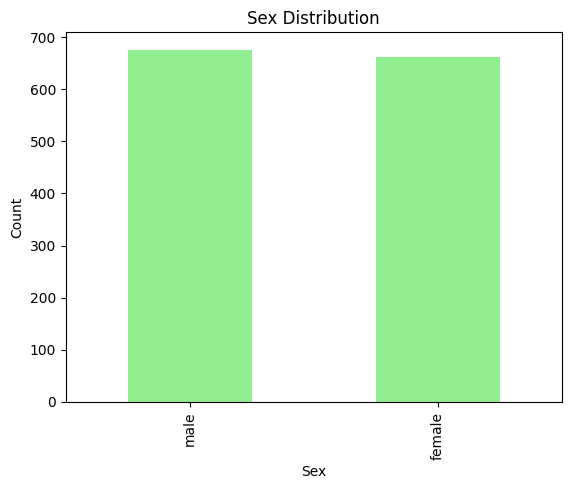

In [14]:
# Count the number of occurrences of each category in the 'sex' column
sex_counts = data['sex'].value_counts()
print(sex_counts)

# Visualize the distribution of 'sex' categories
sex_counts.plot(
    kind='bar', 
    title='Sex Distribution', 
    color='lightgreen'
)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


**OUTLIER**

In [15]:
# Select only the numeric columns from the dataset
numeric_cols = data.select_dtypes(include='number').columns
print(numeric_cols)


Index(['age', 'bmi', 'children', 'charges'], dtype='object')


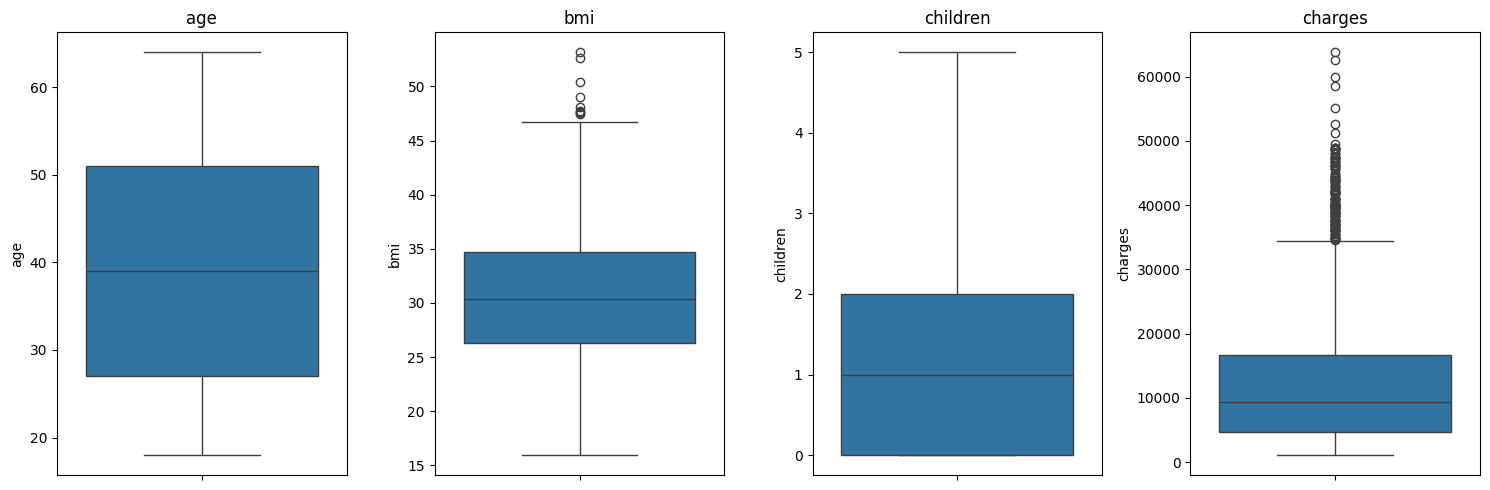

In [16]:
# Create boxplots for each numeric column to detect outliers
plt.figure(figsize=(15, 5))  # Set the figure size

# Loop through each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)  # Create a subplot for each column
    sns.boxplot(y=data[col])                  # Draw boxplot for the column
    plt.title(col)                            # Set the title as the column name

plt.tight_layout()  # Adjust spacing between subplots
plt.show()          # Display all boxplots


In [17]:
# Identify and print outliers for each numeric column using the IQR method
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)       # 25th percentile
    Q3 = data[col].quantile(0.75)       # 75th percentile
    IQR = Q3 - Q1                        # Interquartile Range (IQR)
    
    # Define outliers: values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)][col]
    
    # Print the outlier values for the column
    print(f"{col} outliers:\n{outliers.values}\n")


age outliers:
[]

bmi outliers:
[49.06 48.07 47.52 47.41 50.38 47.6  52.58 47.74 53.13]

children outliers:
[]

charges outliers:
[39611.7577  36837.467   37701.8768  38711.      35585.576   51194.55914
 39774.2763  48173.361   38709.176   37742.5757  47496.49445 37165.1638
 39836.519   43578.9394  47291.055   47055.5321  39556.4945  40720.55105
 36950.2567  36149.4835  48824.45    43753.33705 37133.8982  34779.615
 38511.6283  35160.13457 47305.305   44260.7499  41097.16175 43921.1837
 36219.40545 46151.1245  42856.838   48549.17835 47896.79135 42112.2356
 38746.3551  42124.5153  34838.873   35491.64    42760.5022  47928.03
 48517.56315 41919.097   36085.219   38126.2465  42303.69215 46889.2612
 46599.1084  39125.33225 37079.372   35147.52848 48885.13561 36197.699
 38245.59327 48675.5177  63770.42801 45863.205   39983.42595 45702.02235
 58571.07448 43943.8761  39241.442   42969.8527  40182.246   34617.84065
 42983.4585  42560.4304  40003.33225 45710.20785 46200.9851  46130.5265
 40103

**BOXPLOT : IMPACT OF CATEGORIES ON CHARGES**

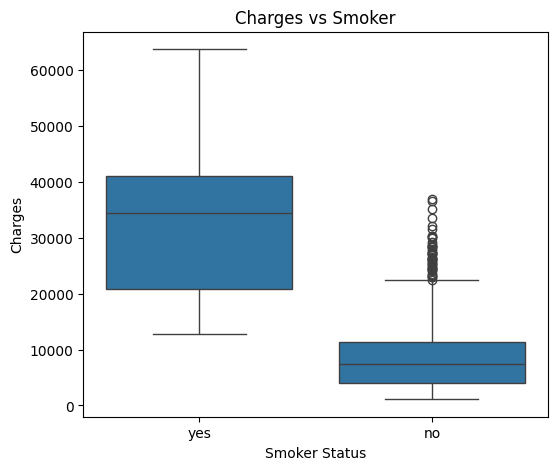

In [18]:
# Boxplot to visualize the relationship between 'smoker' status and 'charges'
plt.figure(figsize=(6, 5))                  # Set figure size
sns.boxplot(x='smoker', y='charges', data=data)  # Boxplot: x = smoker, y = charges
plt.title("Charges vs Smoker")              # Add plot title
plt.xlabel("Smoker Status")                 # Label for x-axis
plt.ylabel("Charges")                       # Label for y-axis
plt.show()                                  # Display the plot


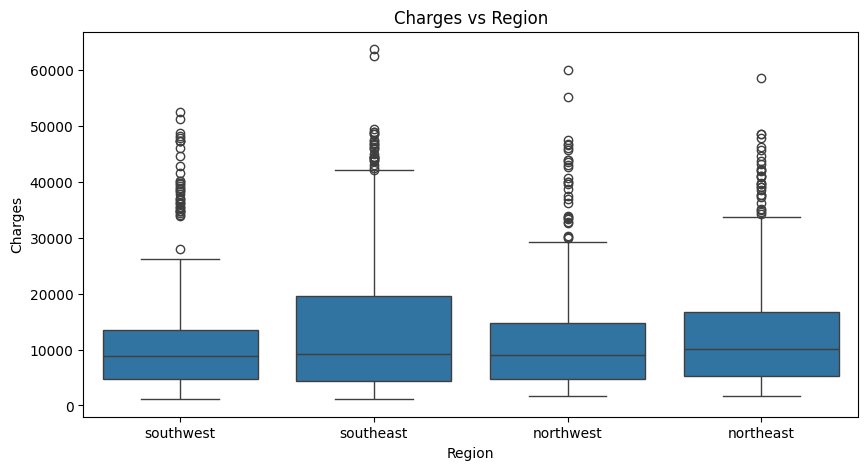

In [19]:
# Boxplot to visualize the relationship between 'region' and 'charges'
plt.figure(figsize=(10, 5))                  # Set figure size
sns.boxplot(x='region', y='charges', data=data)  # Boxplot: x = region, y = charges
plt.title("Charges vs Region")               # Add plot title
plt.xlabel("Region")                         # Label for x-axis
plt.ylabel("Charges")                        # Label for y-axis
plt.show()                                   # Display the plot


**ONE-HOT ENCODING**

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder (drop='first' removes first dummy column to avoid dummy variable trap)
ohe = OneHotEncoder(drop='first') 

# Fit and transform the column (needs 2D array -> data[['region']])
encoded = ohe.fit_transform(data[['region']])

# Convert to DataFrame for readability
encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(['region']))

# Join back with original data
data = pd.concat([data, encoded_df], axis=1)

**LABEL ENCODING**

In [21]:
from sklearn.preprocessing import LabelEncoder

# Creates a label encoder object.
le = LabelEncoder()

# It will loop through sex and smoker
# For each column → create a new column (sex_en, smoker_en)
# Encode categories as numbers
for col in ['sex', 'smoker']:
    data[col + '_en'] = le.fit_transform(data[col])

In [22]:
data

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest,sex_en,smoker_en
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,1.0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,0.0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,0.0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0,0.0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1.0,0.0,0.0,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0.0,0.0,0.0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,1.0,0.0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,1.0,0,0


In [23]:
# Drop the categorical columns 'sex', 'smoker', and 'region' from the dataset
# axis=1 → drop columns, inplace=True → update the DataFrame directly
data.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [24]:
data

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_en,smoker_en
0,19,27.900,0,16884.92400,0.0,0.0,1.0,0,1
1,18,33.770,1,1725.55230,0.0,1.0,0.0,1,0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,1,0
3,33,22.705,0,21984.47061,1.0,0.0,0.0,1,0
4,32,28.880,0,3866.85520,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,0.0,1,0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0,0
1335,18,36.850,0,1629.83350,0.0,1.0,0.0,0,0
1336,21,25.800,0,2007.94500,0.0,0.0,1.0,0,0


**HEATMAP**

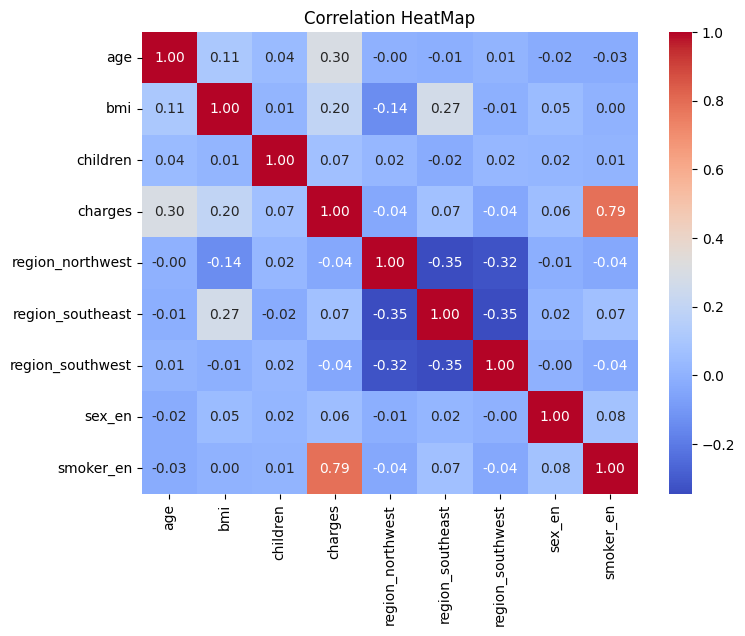

In [25]:
# HeatMap to visualize correlations between numeric features
plt.figure(figsize=(8,6))  # Set the figure size
sns.heatmap(
    data.corr(),            # Compute correlation matrix of the dataset
    annot=True,             # Display correlation values on the heatmap
    cmap='coolwarm',        # Set color scheme (red-blue contrast)
    fmt='.2f'               # Format numbers to 2 decimal places
)
plt.title("Correlation HeatMap")  # Add a title
plt.show()


**REMOVING DUPLICATE**

In [26]:
# Check the total number of duplicate rows in the dataset
data.duplicated().sum()

np.int64(1)

In [27]:
# Remove all duplicate rows from the dataset and update the DataFrame in place
data.drop_duplicates(inplace=True)

**DEFINING THE INDEPENDENT AND DEPENDENT VARIABLE**

In [28]:
# Remove the target column "charges" from the dataset
x = data.drop('charges',axis=1)
# Features (independent variables)

# Store the target column separately
y = data['charges']
# Target variable (dependent variable)

**TRAIN - TEST - SPLIT**

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size=0.2 → 20% data for testing, 80% for training
# random_state=42 → ensures reproducible results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("x_train shape:", x_train.shape)
print("x_test shape :", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


x_train shape: (1069, 8)
x_test shape : (268, 8)
y_train shape: (1069,)
y_test shape : (268,)


**STANDARDIZATION**

In [30]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
x_train_scaled = scaler.fit_transform(x_train)  # Fit on train, transform train
x_test_scaled = scaler.transform(x_test)        # Only transform test

# Optional: convert back to DataFrame to keep column names
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Check the first few rows
x_train_scaled.head()


,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_en,smoker_en
0,-1.157680,-0.996928,-0.907908,-0.572669,-0.605812,-0.57411,0.971409,-0.500292
1,-1.300619,-0.792762,0.766904,-0.572669,-0.605812,-0.57411,0.971409,-0.500292
2,0.914926,1.154664,0.766904,1.746208,-0.605812,-0.57411,-1.029432,-0.500292
3,1.701087,1.806837,-0.907908,-0.572669,1.650678,-0.57411,0.971409,-0.500292
4,0.557580,-0.651417,0.766904,-0.572669,-0.605812,-0.57411,-1.029432,-0.500292


**TRAINING THE MODEL**

**LINEAR REGRESSION**

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create the Linear Regression model
model = LinearRegression()

# 2. Train the model on the training data
model.fit(x_train_scaled, y_train)

# 3. Predict on the test set
y_pred = model.predict(x_test_scaled)

# 4. Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = mse_linear ** 0.5
r2_linear = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("R2:", r2_linear)

# 5. Store in dictionary for comparison
results = {}
results["Linear"] = [mse_linear, rmse_linear, r2_linear]

print("\nResults dictionary:", results)


Linear Regression Metrics:
MSE: 35478020.67523559
RMSE: 5956.342894363587
R2: 0.8069287081198012

Results dictionary: {'Linear': [35478020.67523559, 5956.342894363587, 0.8069287081198012]}


**DECISION TREE REGRESSOR**

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparameter grid (already defined)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for tuning
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)

# Fit on training data
grid_search_dt.fit(x_train_scaled, y_train)

# Best tuned model
best_dt = grid_search_dt.best_estimator_

# Predict on test data
y_pred_dt_tuned = best_dt.predict(x_test_scaled)

# Evaluate performance
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
rmse_dt_tuned = mse_dt_tuned ** 0.5
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)

print("Tuned Decision Tree Metrics:")
print("Best Parameters:", grid_search_dt.best_params_)
print("MSE:", mse_dt_tuned)
print("RMSE:", rmse_dt_tuned)
print("R2:", r2_dt_tuned)

# Store in results dictionary
results["DecisionTree"] = [mse_dt_tuned, rmse_dt_tuned, r2_dt_tuned]


Tuned Decision Tree Metrics:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
MSE: 19461664.31680552
RMSE: 4411.537636335603
R2: 0.8940896757972968


**RANDON FOREST**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparameter grid (already defined)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for tuning
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit on training data
grid_search_rf.fit(x_train_scaled, y_train)

# Best tuned Random Forest model
best_rf = grid_search_rf.best_estimator_

# Predict on test data
y_pred_rf_tuned = best_rf.predict(x_test_scaled)

# Evaluate performance
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mse_rf_tuned ** 0.5
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Metrics:")
print("Best Parameters:", grid_search_rf.best_params_)
print("MSE:", mse_rf_tuned)
print("RMSE:", rmse_rf_tuned)
print("R2:", r2_rf_tuned)

# Store in results dictionary
results["RandomForest"] = [mse_rf_tuned, rmse_rf_tuned, r2_rf_tuned]

Tuned Random Forest Metrics:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
MSE: 17772387.247506242
RMSE: 4215.730926838933
R2: 0.9032827170071992


**GRADIENT BOOSTING REGRESSOR**

In [34]:
# Hyperparameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# RandomizedSearchCV for tuning
random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search_gb.fit(x_train_scaled, y_train)

# Best tuned Gradient Boosting model
best_gb = random_search_gb.best_estimator_

# Predict on test data
y_pred_gb_tuned = best_gb.predict(x_test_scaled)

# Evaluate performance
mse_gb = mean_squared_error(y_test, y_pred_gb_tuned)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb_tuned)

print("Tuned Gradient Boosting Metrics:")
print("Best Parameters:", random_search_gb.best_params_)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R2:", r2_gb)

# Store in results dictionary
results["GradientBoost"] = [mse_gb, rmse_gb, r2_gb]

Tuned Gradient Boosting Metrics:
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.05}
MSE: 18030343.774335377
RMSE: 4246.215229393745
R2: 0.9018789182908127


**XGBOOST REGRESSOR**

In [35]:
# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Create XGBoost Regressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# RandomizedSearchCV for tuning
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search_xgb.fit(x_train_scaled, y_train)

# Best tuned XGBoost model
best_xgb = random_search_xgb.best_estimator_

# Predict on test data
y_pred_xgb_tuned = best_xgb.predict(x_test_scaled)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb_tuned)

print("Tuned XGBoost Metrics:")
print("Best Parameters:", random_search_xgb.best_params_)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R2:", r2_xgb)

# Store in results dictionary
results["XGBoost"] = [mse_xgb, rmse_xgb, r2_xgb]


Tuned XGBoost Metrics:
Best Parameters: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 1.0}
MSE: 18503405.430454295
RMSE: 4301.558488554386
R2: 0.8993045180467308


**SUPPORT VECTOR MACHINE(SVM)**

In [36]:
# Hyperparameter grid for SVR
param_dist = {
    'C': [0.1, 1, 10, 100],               # Regularization strength
    'epsilon': [0.01, 0.05, 0.1, 0.2],    # Margin of tolerance
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernels
    'gamma': ['scale', 'auto']            # Kernel coefficient
}

# Create SVR model
svr = SVR()

# RandomizedSearchCV for tuning
random_search_svr = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=20,           # Number of random combinations
    cv=5,                # 5-fold cross-validation
    scoring='r2',        # Optimize for R² score
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search_svr.fit(x_train_scaled, y_train)

# Best tuned SVR model
best_svr = random_search_svr.best_estimator_

# Predict on test data
y_pred_svr_tuned = best_svr.predict(x_test_scaled)

# Evaluate performance
mse_svr = mean_squared_error(y_test, y_pred_svr_tuned)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr_tuned)

print("Tuned SVR Metrics:")
print("Best Parameters:", random_search_svr.best_params_)
print("MSE:", mse_svr)
print("RMSE:", rmse_svr)
print("R2:", r2_svr)

# Store in results dictionary
results["SVR"] = [mse_svr, rmse_svr, r2_svr]

Tuned SVR Metrics:
Best Parameters: {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.2, 'C': 10}
MSE: 97836738.03447166
RMSE: 9891.245524931208
R2: 0.4675727381024595


**FINAL COMPARISON**

Final Comparison of Regression Models:
                        MSE         RMSE        R2
RandomForest   1.777239e+07  4215.730927  0.903283
GradientBoost  1.803034e+07  4246.215229  0.901879
XGBoost        1.850341e+07  4301.558489  0.899305
DecisionTree   1.946166e+07  4411.537636  0.894090
Linear         3.547802e+07  5956.342894  0.806929
SVR            9.783674e+07  9891.245525  0.467573


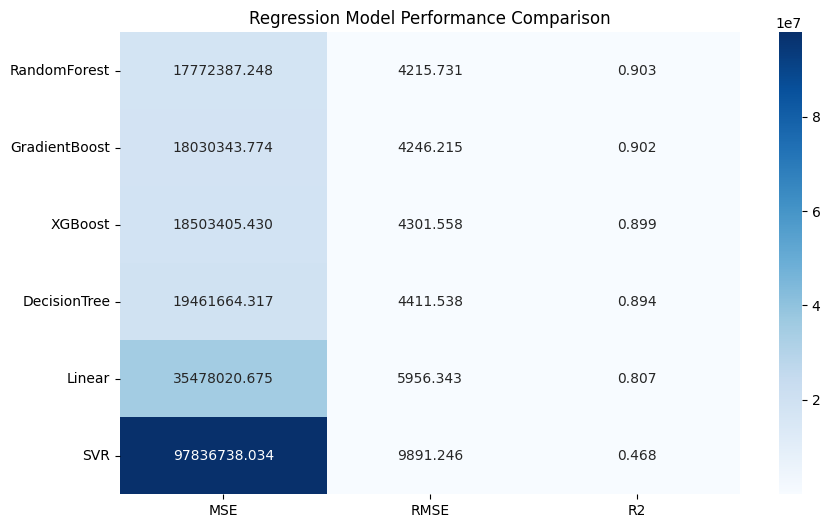

In [37]:
# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results, index=["MSE", "RMSE", "R2"]).T

# Sort by R2 score (descending) to see the best model on top
results_df = results_df.sort_values("R2", ascending=False)

# Print the final comparison table
print("Final Comparison of Regression Models:")
print(results_df)

# Plot heatmap for visualization
plt.figure(figsize=(10,6))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap="Blues")
plt.title("Regression Model Performance Comparison")
plt.show()


**FROM THESE RESULTS,HERE'S THE CONCLUSION:**

Regression Model Performance Conclusion
From the evaluation metrics (MSE, RMSE, R²):

1. Top Performer:
   1. Random Forest achieved the highest R² (0.903) and lowest RMSE (4215.73).
   2. This indicates it predicts charges most accurately among all models.

2. Strong Alternatives:
   1. Gradient Boosting – R² = 0.902, RMSE = 4246.21
   2. XGBoost – R² = 0.899, RMSE = 4301.56
   3. These ensemble methods also performed very well, slightly behind Random Forest.

3. Moderate Performance:
   1. Decision Tree – R² = 0.894, RMSE = 4411.54
   2. Linear Regression – R² = 0.807, RMSE = 5956.34
   3. Simple models or single trees perform reasonably but not as well as ensembles.

4. Lowest Performance:
   1. SVR – R² = 0.468, RMSE = 9891.25
   2. SVR struggled with this dataset, likely due to non-linearity and sensitivity to feature scaling.

* Summary:
   1. Best Model: Random Forest
   2. Recommended Ensemble Models: Gradient Boosting, XGBoost
   3. Baseline: Linear Regression
   4. Least Effective: SVR

                                                  ## COMPLETED ##